<a href="https://colab.research.google.com/github/ChamikaRohan/Machine-Learning-based-Red-Wine-Quality-Prediction/blob/main/Red_Wine_Quality_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Visualization

## Importing the libraries

In [222]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Loading Dataset

In [223]:
dataset = pd.read_csv('winequality-red.csv')

## Exploration through dataset

In [224]:
#Checking the dataset size

print("Dataset shape: ", dataset.shape)

Dataset shape:  (1599, 12)


In [225]:
#Checking the data distribution

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [226]:
#Getting the information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [227]:
#Getting statistical summary of the numerical columns in the dataset

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Plotting graphs for better insight to data distribution

### Target variable(Quality) distribution

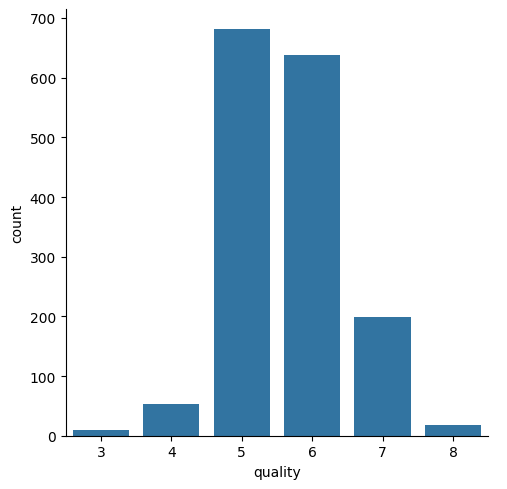

In [228]:
sns.catplot(x='quality', data=dataset, kind='count')
plt.show()

### Feature Comparison with Target Variable

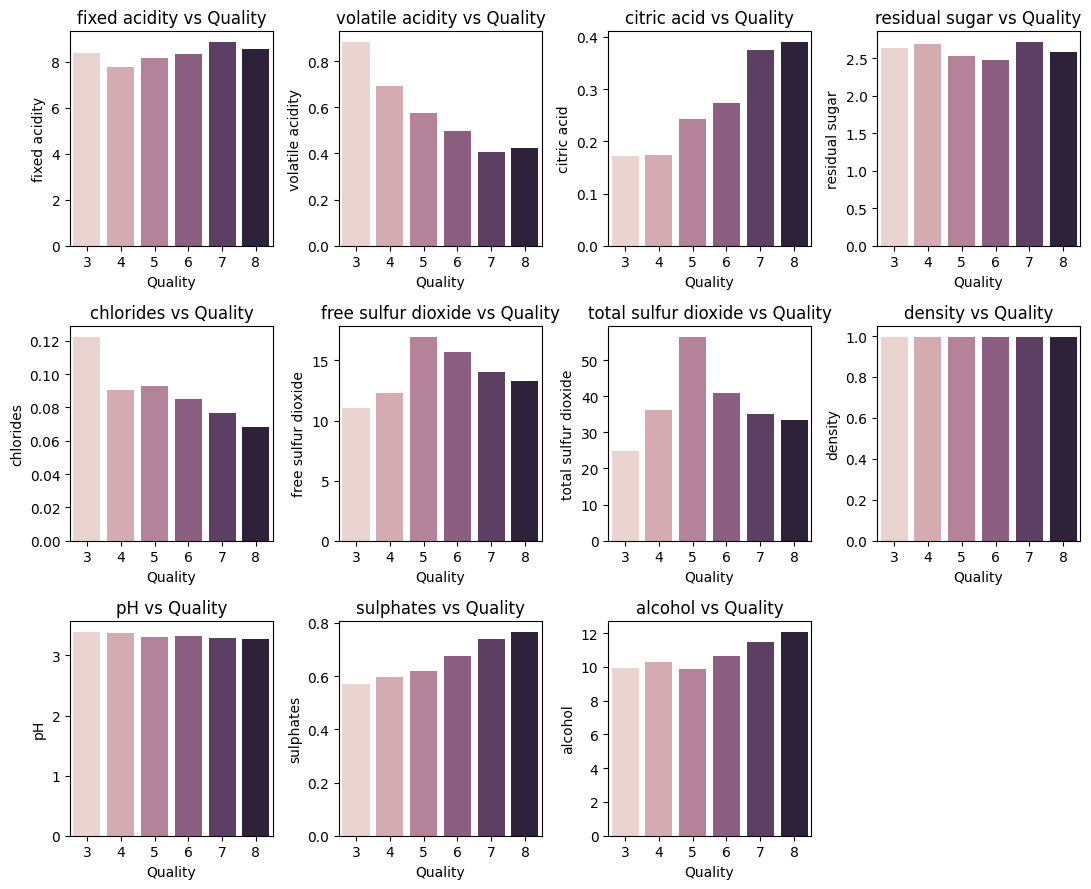

In [229]:
#List of features (excluding 'quality' which is the target)
features = dataset.columns.drop('quality')

#Setting up the figure with appropriate size
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11, 9))

#Flatten the axes array for easier iteration
axes = axes.flatten()

#This loop goes through each feature and create the seperate bar plots for each feature
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=dataset, hue='quality', ax=axes[i], dodge=False, errorbar=None)
    axes[i].set_title(f'{feature} vs Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)
    axes[i].legend_.remove()

#Remove the last subplot if the number of features is odd
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

#Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Pre-processing data

## Handling Null Values/Missing Values

In [230]:
#Check for null/missing values in each column
missing_values = dataset.isnull().sum()

#Print the number of null/missing values in each column
print("Null/Missing values in each column: \n")
print(missing_values)

#Total null/missing values in the dataset
total_missing = missing_values.sum()
print("\nTotal Null/Missing Values in the Dataset:", total_missing)

Null/Missing values in each column: 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total Null/Missing Values in the Dataset: 0


## Handling Duplicate values

In [231]:
#Check for duplicate rows
duplicates = dataset[dataset.duplicated()]

#Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free 

In [232]:
#Remove duplicate rows while keeping the first occurrence of that data row
dataset.drop_duplicates(inplace=True)

In [233]:
#Now Checking the dataset size

print("Dataset shape: ", dataset.shape)

Dataset shape:  (1359, 12)


## Handling Outliers

### Detecting Outliers

#### Box-plots

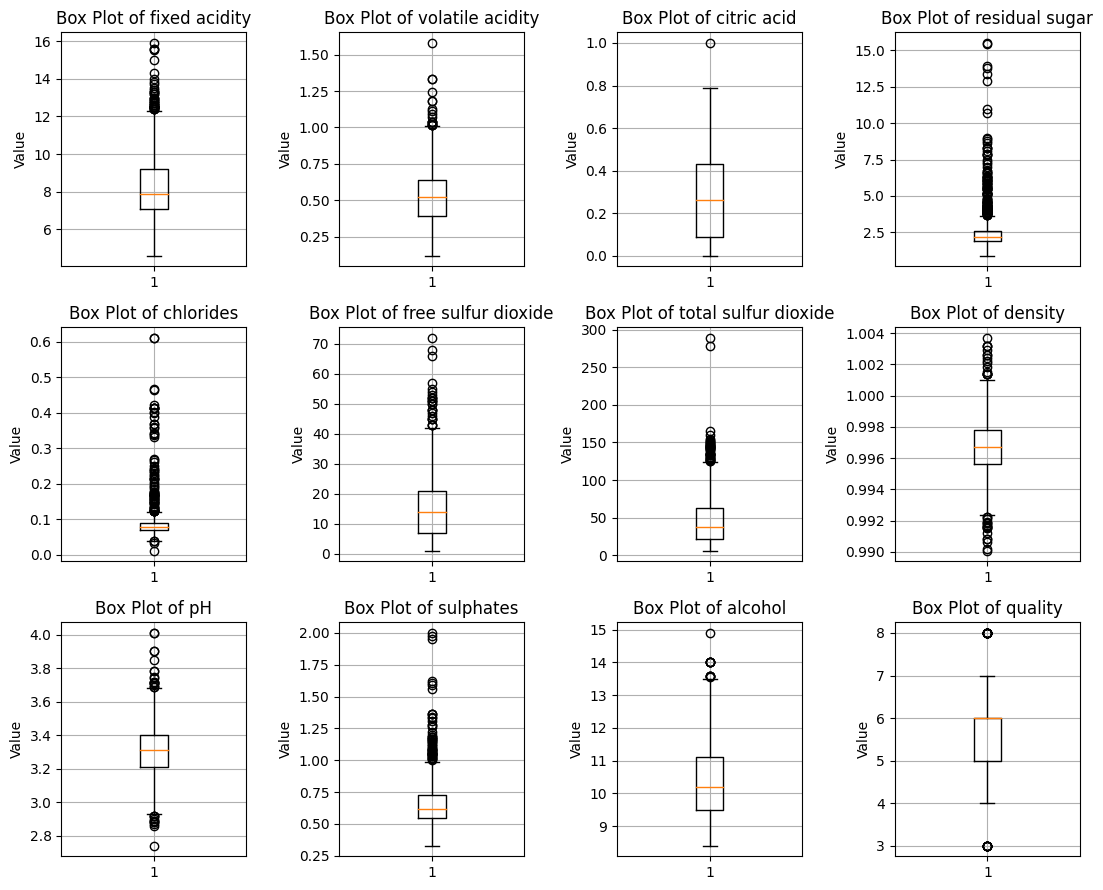

In [234]:
#Getting the columns list
columns = dataset.columns

#Here Defining the number of columns for subplots
num_cols = 4  # Number of columns per row, adjust as needed

#Here calculating the number of rows needed
num_rows = -(-len(columns) // num_cols)

#Here creating the figure with multiple columns for box plots
fig = plt.figure(figsize=(11, 9))

#Iterate through each column and create a box plot using a for loop
for i, column in enumerate(columns):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.boxplot(dataset[column])
    ax.set_title("Box Plot of " + column)
    ax.set_ylabel("Value")
    ax.grid(True)

#Here adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

#### Using Z-Scores

In [235]:
# Calculate Z-scores for each column in the dataset
z_scores = (dataset - dataset.mean()) / dataset.std()

z_scores

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524238,0.931657,-1.392745,-0.460987,-0.245532,-0.468381,-0.383908,0.583788,1.291397,-0.578348,-0.954023,-0.756762
1,-0.293955,1.915095,-1.392745,0.056644,0.200020,0.871682,0.603851,0.048719,-0.708135,0.124776,-0.584360,-0.756762
2,-0.293955,1.259470,-1.188180,-0.165198,0.078506,-0.085506,0.214734,0.155733,-0.321129,-0.051005,-0.584360,-0.756762
3,1.663455,-1.363032,1.471170,-0.460987,-0.265785,0.105932,0.394326,0.690802,-0.966139,-0.461161,-0.584360,0.457452
5,-0.524238,0.713115,-1.392745,-0.534935,-0.265785,-0.276944,-0.204316,0.583788,1.291397,-0.578348,-0.954023,-0.756762
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.869663,0.494574,-0.983615,-0.460987,-0.407552,1.158838,-0.264180,-0.106451,0.710888,0.945087,-0.861607,0.457452
1594,-1.215088,0.385303,-0.983615,-0.387040,0.038001,1.541713,-0.084587,-0.967912,0.904391,-0.461161,0.062551,-0.756762
1595,-1.387801,0.112125,-0.881332,-0.239145,-0.529066,2.211745,0.124937,-0.850197,1.355898,0.593525,0.709462,0.457452
1597,-1.387801,0.631162,-0.779049,-0.387040,-0.265785,1.541713,-0.084587,-0.662923,1.678403,0.300557,-0.214696,-0.756762


In [236]:
#Define threshold for outliers (3 standard deviations from the mean)
threshold = 3

#Find and display outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)
outliers_indices = outliers[outliers].index

print("Outliers Detected:")
print(outliers_indices)

print("Outliers count:", len(outliers_indices))

Outliers Detected:
Index([  13,   14,   15,   17,   19,   33,   38,   42,   43,   45,
       ...
       1370, 1374, 1434, 1469, 1474, 1478, 1505, 1558, 1574, 1589],
      dtype='int64', length=127)
Outliers count: 127


### Treating Outliers

In [237]:
#Remove outliers from the dataset using z scores > threshold as calculated above
dataset_no_outliers = dataset[~outliers]

#Print the shape of the original and outlier-removed datasets
print("\nOriginal Dataset Shape:", dataset.shape)
print("Dataset Shape after Removing Outliers:", dataset_no_outliers.shape)

dataset = dataset_no_outliers


Original Dataset Shape: (1359, 12)
Dataset Shape after Removing Outliers: (1232, 12)


## Handling Continuous Target Variable

In [238]:
dataset['quality'].value_counts()

quality
5    525
6    491
7    154
4     47
8     15
Name: count, dtype: int64

In [239]:
#classifying wine qulaity as good or bad using target variable
#'Bad' or 0 if quality < 5.5
#'Good' or 1 if quality >= 5.5

dataset['quality' ]= dataset['quality'].apply(lambda x:1 if x>5.5 else 0)
dataset.head()

<ipython-input-239-5381ffe07e5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['quality' ]= dataset['quality'].apply(lambda x:1 if x>5.5 else 0)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


## X and Y Split

In [240]:
x = dataset.drop('quality',axis=1)
y = dataset['quality']

In [241]:
#Now let's plot the x
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [242]:
#Now let's plot the y
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

##  Handling Imbalanced Data

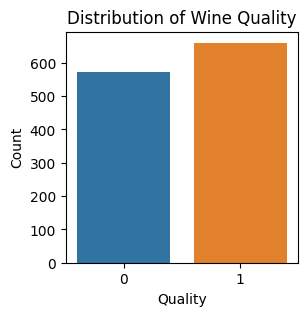


Class distribution of wine quality:
quality
1    660
0    572
Name: count, dtype: int64


In [243]:
#Here Counting the occurrences of each class
class_counts = y.value_counts()

#Plot the class distribution of Wine Quality
plt.figure(figsize=(3, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False, legend=False)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

print("\nClass distribution of wine quality:")
print(class_counts)

### Oversampling using SMOTE

In [244]:
#Here initializinng the SMOTE
smote = SMOTE(random_state=51)

#Apply SMOTE to generate new artificial samples
X_resampled, y_resampled = smote.fit_resample(X, y)

#Checking the class distribution after SMOTE
print("Class distribution of wine quality after SMOTE:")
print(y_resampled.value_counts())

x= X_resampled
y =y_resampled

Class distribution of wine quality after SMOTE:
quality
0    660
1    660
Name: count, dtype: int64


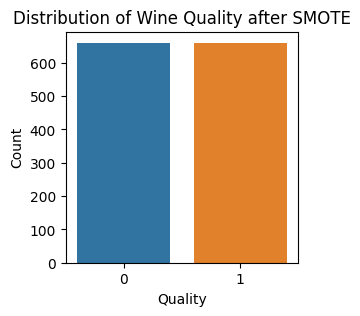


Class distribution of wine quality after SMOTE:
quality
0    660
1    660
Name: count, dtype: int64


In [245]:
#Here Counting the occurrences of each class after SMOTE
class_counts = y.value_counts()

#Plot the class distribution of Wine Quality after SMOTE
plt.figure(figsize=(3, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False, legend=False)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality after SMOTE')
plt.show()

print("\nClass distribution of wine quality after SMOTE:")
print(class_counts)

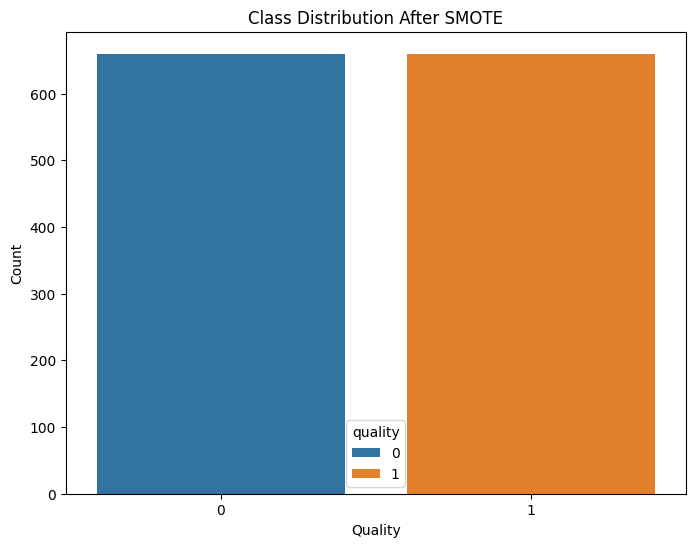


Class distribution after SMOTE:
quality
0    660
1    660
Name: count, dtype: int64


In [246]:
# Count the occurrences of each class after SMOTE
class_counts = y.value_counts()

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()

print("\nClass distribution after SMOTE:")
print(class_counts)

## Train Test Split

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [248]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (1056, 11)
x_test shape:  (264, 11)
y_train shape:  (1056,)
y_test shape:  (264,)


## Feature Scaling

### Standardization

In [249]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [250]:
#Cheking x_train after appplied standard scaller
x_train

array([[-0.8327458 ,  0.57841252, -1.10529406, ...,  0.96173571,
        -0.82484297, -0.87139091],
       [-0.36087011,  0.94855736, -1.13697596, ..., -0.37903491,
        -0.21567028, -1.26299682],
       [-1.03567403,  2.16247645, -1.19005926, ...,  1.55372078,
        -0.44831057,  0.40132829],
       ...,
       [ 0.86604612, -1.24241855,  1.464106  , ..., -0.23586782,
         1.41281168, -0.77348943],
       [ 2.21565396,  0.29718614,  2.10110566, ..., -1.88228934,
        -0.60340409, -0.38188353],
       [ 2.21565396,  0.97816514,  1.4110227 , ..., -1.02328681,
         1.56790521,  1.77194897]])

In [251]:
#Checking x_test after appplied standard scaller
x_test

array([[ 1.36082991, -1.62290974,  1.09124269, ..., -1.21420354,
         2.04245227,  0.55934705],
       [-0.95723472, -0.21932885, -0.92699649, ...,  0.07114819,
        -0.02358126, -0.71161676],
       [-0.77422962,  0.30701399, -1.34099427, ..., -0.07166867,
        -0.34143257, -1.0049161 ],
       ...,
       [-0.65222621, -0.62870661,  0.21149741, ...,  0.85664091,
        -0.9771352 , -1.0049161 ],
       [-1.07923812,  0.0146013 , -0.77174732, ...,  0.14255662,
        -0.9771352 , -1.10268255],
       [-0.77422962, -0.92111929, -0.2542501 , ...,  0.57100719,
        -0.89767237, -0.32055098]])

## Feature Selection

### Correlation Matrix

#### Correlation Matrix Generation

In [252]:
corr = dataset.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295842,0.693249,0.184156,0.155797,-0.131519,-0.091455,0.658659,-0.709816,0.205601,-0.017930,0.115322
volatile acidity,-0.295842,1.000000,-0.586314,0.034444,0.081953,0.005716,0.114398,0.004609,0.262100,-0.338508,-0.217095,-0.303967
citric acid,0.693249,-0.586314,1.000000,0.175117,0.094445,-0.061288,0.012752,0.358471,-0.526370,0.313997,0.166913,0.181418
residual sugar,0.184156,0.034444,0.175117,1.000000,0.104471,-0.004159,0.075256,0.330967,-0.079046,0.050731,0.161520,0.014457
chlorides,0.155797,0.081953,0.094445,0.104471,1.000000,-0.049994,0.064625,0.300775,-0.181016,0.041176,-0.206772,-0.102801
free sulfur dioxide,-0.131519,0.005716,-0.061288,-0.004159,-0.049994,1.000000,0.654184,-0.024826,0.084844,0.046576,-0.092870,-0.075293
total sulfur dioxide,-0.091455,0.114398,0.012752,0.075256,0.064625,0.654184,1.000000,0.125982,-0.029544,-0.045177,-0.281309,-0.274722
density,0.658659,0.004609,0.358471,0.330967,0.300775,-0.024826,0.125982,1.000000,-0.322901,0.122533,-0.482930,-0.155545
pH,-0.709816,0.262100,-0.526370,-0.079046,-0.181016,0.084844,-0.029544,-0.322901,1.000000,-0.053683,0.139864,-0.023543
sulphates,0.205601,-0.338508,0.313997,0.050731,0.041176,0.046576,-0.045177,0.122533,-0.053683,1.000000,0.249283,0.333894


#### Correlation Matrix as Heatmap

<Axes: >

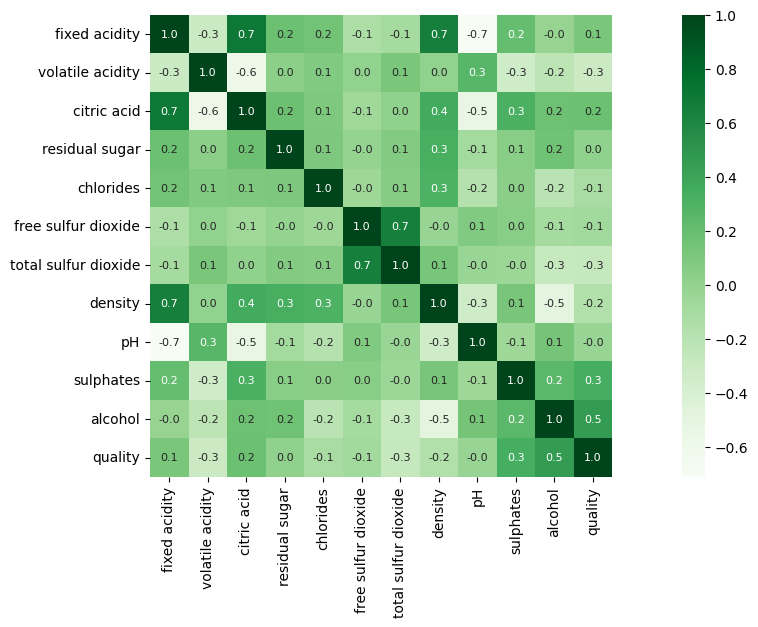

In [253]:
plt.figure(figsize=(18,6))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

### Chi-square Test

In [254]:
#Define features (excluding 'quality' column)
features = dataset.drop('quality', axis=1).columns

#Calculate Chi-square scores
chi2_scores, _ = chi2(dataset[features], dataset['quality'])

#Create a DataFrame to display the results
chi2_result = pd.DataFrame({'Feature': features, 'Chi2 Score': chi2_scores})
chi2_result.sort_values(by='Chi2 Score', ascending=False, inplace=True)
chi2_result.reset_index(drop=True, inplace=True)

#Display the Chi-square test results
print("Chi-square Test Results (Chi2 Scores only):")
print(chi2_result)

Chi-square Test Results (Chi2 Scores only):
                 Feature   Chi2 Score
0   total sulfur dioxide  1891.702242
1    free sulfur dioxide    40.045328
2                alcohol    26.142920
3       volatile acidity     6.417427
4            citric acid     5.536658
5          fixed acidity     5.362049
6              sulphates     3.607373
7              chlorides     0.080132
8         residual sugar     0.073451
9                     pH     0.004090
10               density     0.000088


# Creating Machine Learning Algorithms

## Random Forest Classifier

In [275]:
#Creating Random Forest Classifier Instance
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [276]:
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [277]:
RF_train_prediction = random_forest_classifier.predict(x_train)
RF_train_accuracy = accuracy_score(RF_train_prediction, y_train)
print('Train Data Accuracy : ', RF_train_accuracy)

Train Data Accuracy :  1.0


In [278]:
RF_test_prediction = random_forest_classifier.predict(x_test)
RF_test_accuracy = accuracy_score(RF_test_prediction, y_test)
print('Test Data Accuracy : ', RF_test_accuracy)

Test Data Accuracy :  0.7689393939393939


## Support vector Machine (SVC)

In [279]:
#Creating Random Support vector Classifier Instance
support_vector_classifier = SVC()

In [280]:
support_vector_classifier.fit(x_train, y_train)

SVC()

In [281]:
SVM_train_prediction = support_vector_classifier.predict(x_train)
SVM_train_accuracy = accuracy_score(SVM_train_prediction, y_train)
print('Train Data Accuracy : ', SVM_train_accuracy)

Train Data Accuracy :  0.7964015151515151


In [282]:
SVM_test_prediction = support_vector_classifier.predict(x_test)
SVM_test_accuracy = accuracy_score(SVM_test_prediction, y_test)
print('Test Data Accuracy : ', SVM_test_accuracy)

Test Data Accuracy :  0.7537878787878788


# Evaluation Metrics

## Confusion Metrix

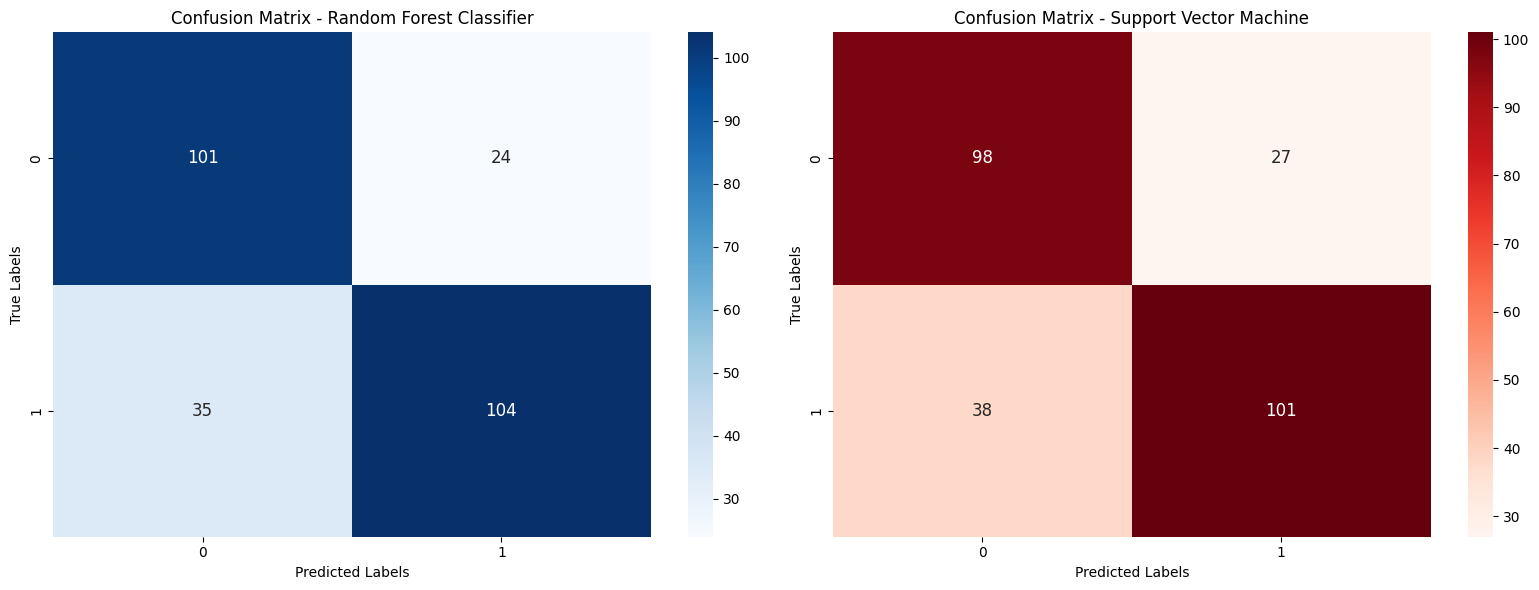

In [263]:
#Confusion matrix for Random Forest
conf_matrix_RF = confusion_matrix(y_test, RF_test_prediction)

#Confusion matrix for Support Vector Machine
conf_matrix_SVM = confusion_matrix(y_test, SVM_test_prediction)

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12}, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix - Random Forest Classifier')

#Plot confusion matrix for Support Vector Machine
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12}, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix - Support Vector Machine')

plt.tight_layout()
plt.show()

##Accuracy

In [264]:
#Accuracy for Random Forest
accuracy_RF = accuracy_score(y_test, RF_test_prediction)
print("Accuracy - Random Forest:", accuracy_RF)

#Accuracy for Support Vector Machine
accuracy_SVM = accuracy_score(y_test, SVM_test_prediction)
print("Accuracy - Support Vector Machine:", accuracy_SVM)

Accuracy - Random Forest: 0.7765151515151515
Accuracy - Support Vector Machine: 0.7537878787878788


## Precision & Recall

In [265]:
#Precision for Random Forest
precision_RF = precision_score(y_test, RF_test_prediction)
print("Precision - Random Forest:", precision_RF)

#Precision for Support Vector Machine
precision_SVM = precision_score(y_test, SVM_test_prediction)
print("Precision - Support Vector Machine:", precision_SVM, "\n")

#Recall for Random Forest
recall_RF = recall_score(y_test, RF_test_prediction)
print("Recall - Random Forest:", recall_RF)

#Recall for Support Vector Machine
recall_SVM = recall_score(y_test, SVM_test_prediction)
print("Recall - Support Vector Machine:", recall_SVM)

Precision - Random Forest: 0.8125
Precision - Support Vector Machine: 0.7890625 

Recall - Random Forest: 0.7482014388489209
Recall - Support Vector Machine: 0.7266187050359713


##F1-Score

In [266]:
#F1-score for Random Forest
f1_RF = f1_score(y_test, RF_test_prediction)
print("F1-Score - Random Forest:", f1_RF)

#F1-score for Support Vector Machine
f1_SVM = f1_score(y_test, SVM_test_prediction)
print("F1-Score - Support Vector Machine:", f1_SVM)

F1-Score - Random Forest: 0.7790262172284644
F1-Score - Support Vector Machine: 0.756554307116105


##AU-ROC

In [267]:
#AUROC for Random Forest
auroc_RF = roc_auc_score(y_test, RF_test_prediction)
print("AUROC - Random Forest:", auroc_RF)

#AUROC for Support Vector Machine
auroc_SVM = roc_auc_score(y_test, SVM_test_prediction)
print("AUROC - Support Vector Machine:", auroc_SVM)


AUROC - Random Forest: 0.7781007194244605
AUROC - Support Vector Machine: 0.7553093525179856


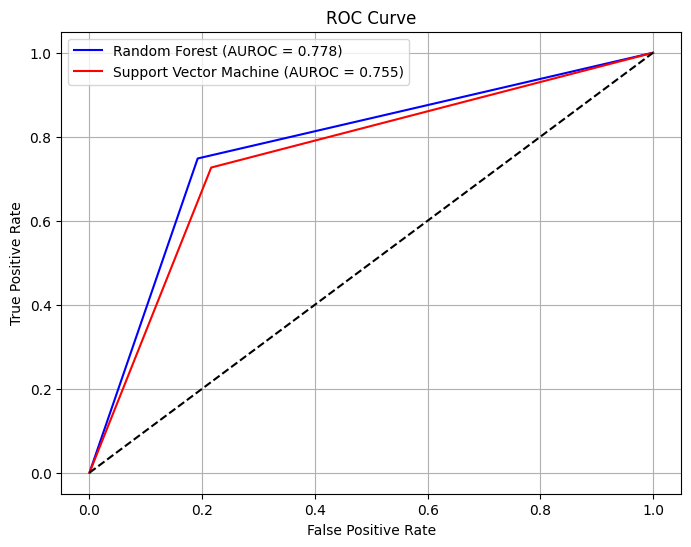

In [268]:
#Calculate ROC curve for Random Forest
fpr_RF, tpr_RF, _ = roc_curve(y_test, RF_test_prediction)

#Calculate ROC curve for Support Vector Machine
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, SVM_test_prediction)

#Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUROC = {:.3f})'.format(auroc_RF), color='blue')
plt.plot(fpr_SVM, tpr_SVM, label='Support Vector Machine (AUROC = {:.3f})'.format(auroc_SVM), color='red')

#Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()